<IPython.core.display.Javascript object>


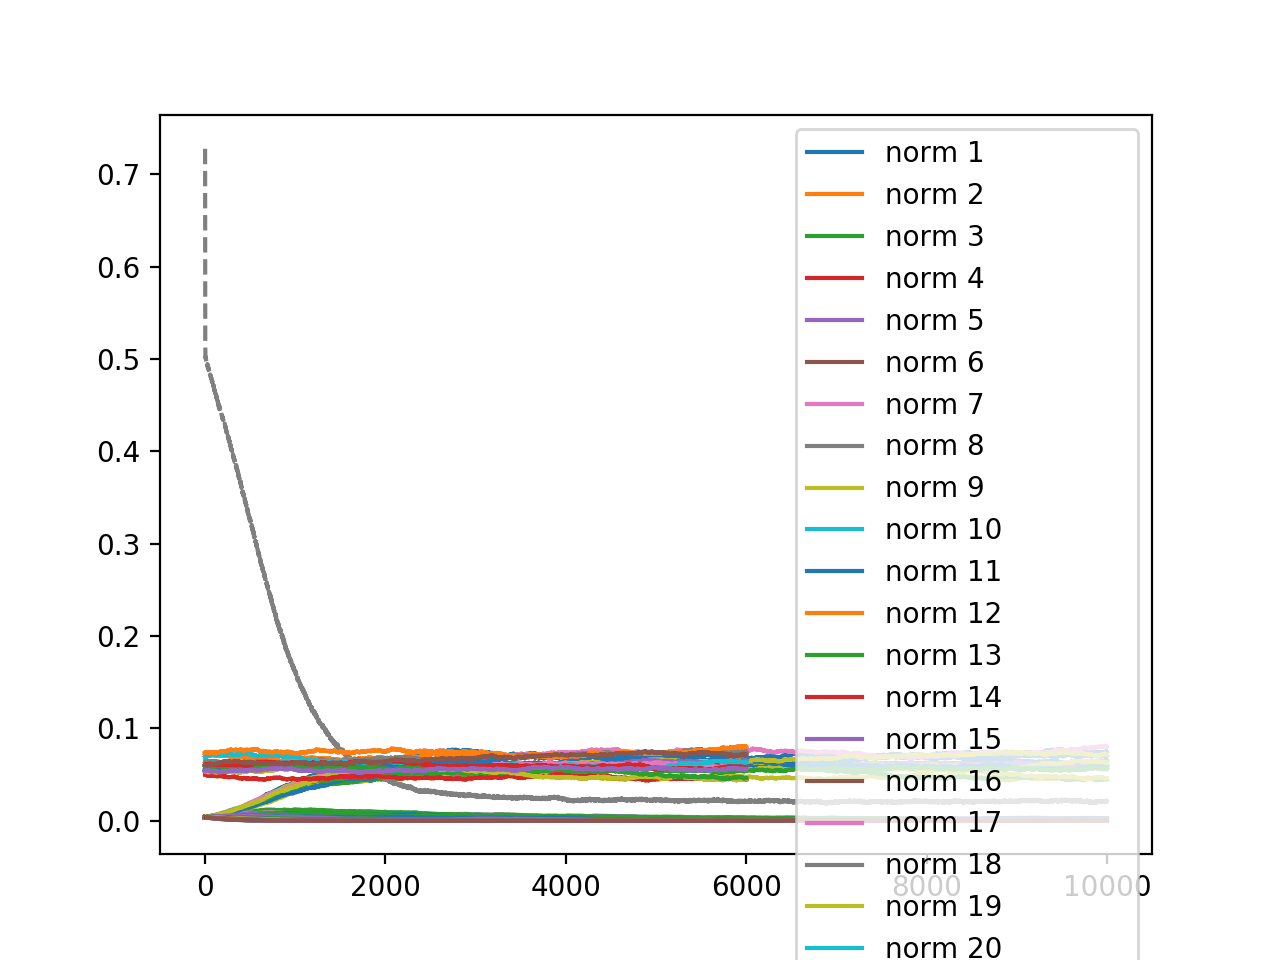

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
%matplotlib notebook

import julia
J= julia.Julia()
J.include("populationSimulationSimple.jl")

stats, imageMatrix = J.evolve()

fig = plt.figure()

ax1 = plt.subplot(1,1,1)

for i in range(256):
	line = []
	for stat in stats:
		line.append(stat[0][i])

	plt.plot(line, label = "norm " + str(i+1))

coops = [stat[1] for stat in stats]
plt.plot(coops, label="Cooperation Rate", color="grey", linestyle="dashed")

# plt.legend()


In [4]:
len(stats)

2500

Below is a plot of all same type individuals starting with the same initial conditions as the two type simulations. Stern judging evolves.

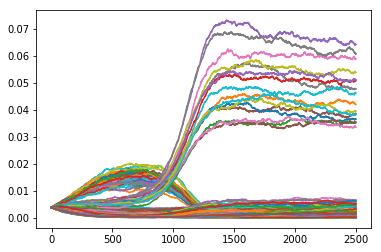

In [5]:
norms = J.NORMS
len(norms)
for i in range(256):
	line = []
	for stat in stats:
		line.append(stat[0][i])

	plt.plot(line, label = "norm " + str(i+1))

In [13]:
normInds = [i for i,r in enumerate(stats[2000][0]) if r > 0.03]
print(normInds)
for i in normInds:
    print("Norm " + str(i))
    print(norms[i][0])
    print(norms[i][1])

[0, 2, 8, 10, 32, 34, 40, 42, 128, 130, 136, 138, 160, 162, 168]
Norm 0
[[0 0]
 [0 0]]
[[0 0]
 [0 0]]
Norm 2
[[0 0]
 [0 0]]
[[0 1]
 [0 0]]
Norm 8
[[0 0]
 [0 0]]
[[0 0]
 [0 1]]
Norm 10
[[0 0]
 [0 0]]
[[0 1]
 [0 1]]
Norm 32
[[0 1]
 [0 0]]
[[0 0]
 [0 0]]
Norm 34
[[0 1]
 [0 0]]
[[0 1]
 [0 0]]
Norm 40
[[0 1]
 [0 0]]
[[0 0]
 [0 1]]
Norm 42
[[0 1]
 [0 0]]
[[0 1]
 [0 1]]
Norm 128
[[0 0]
 [0 1]]
[[0 0]
 [0 0]]
Norm 130
[[0 0]
 [0 1]]
[[0 1]
 [0 0]]
Norm 136
[[0 0]
 [0 1]]
[[0 0]
 [0 1]]
Norm 138
[[0 0]
 [0 1]]
[[0 1]
 [0 1]]
Norm 160
[[0 1]
 [0 1]]
[[0 0]
 [0 0]]
Norm 162
[[0 1]
 [0 1]]
[[0 1]
 [0 0]]
Norm 168
[[0 1]
 [0 1]]
[[0 0]
 [0 1]]


<IPython.core.display.Javascript object>


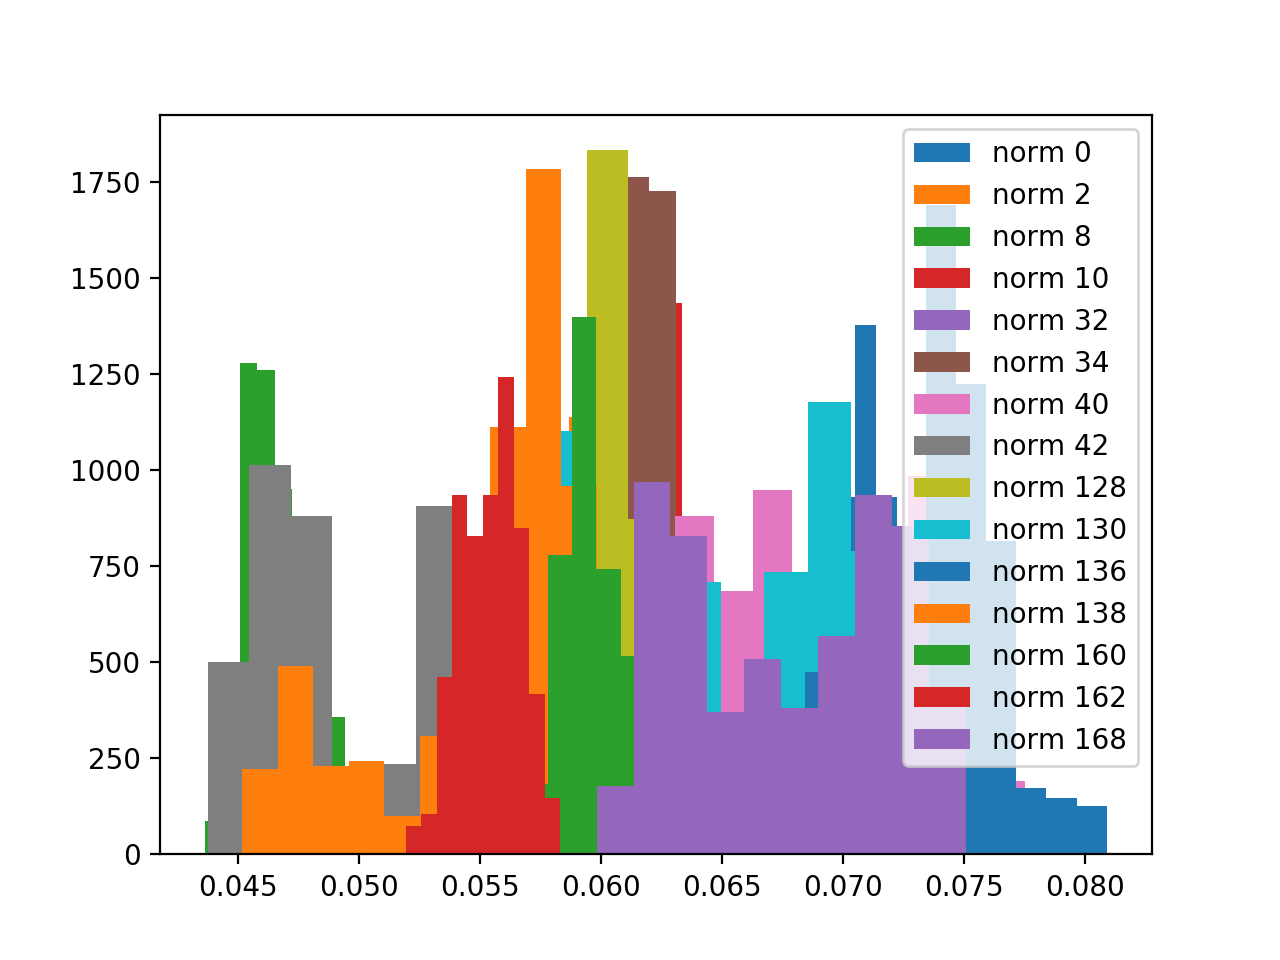

In [17]:
normPropSeries = [[stat[0][i] for stat in stats[4000:]] for i in normInds]
histfig = plt.figure()
for i in range(len(normInds)):
    plt.hist(normPropSeries[i], label = "norm " + str(normInds[i]))
    
plt.legend()
plt.show()

            


In [1]:
defaultParameters = {"PROGRESSVERBOSE" : True,
	"NUMAGENTSPERNORM" : 200,
	"NUMGENERATIONS" : 5000,
	"BATCHSPERAGENT" : 2,
	"BATCHSIZE" : 50,
	"NUMIMITATE" : 430,
	"Eobs" : 0.02,
	"Ecoop" : 0.00,
	"w" : 0.5,
	"ustrat" : 0.00025,
	"utype" : 0.0, #type mutation rate
	"gameBenefit" : 8.0,
	"gameCost" : 1.0,
	"intergroupUpdateP": 0.0,
    "perpetratorNorms" : False          
}

In [2]:
import julia
J = julia.Julia()
J.include("populationSimulationSimpleController.jl")
# J.include("populationSimulationSimple.jl")
# J.evolve(defaultParameters)

paramDicts = []

for i in range(5):
    myparams = defaultParameters.copy()
    myparams["w"] = 0.01 * i**2
    paramDicts.append(myparams)

print("paramDicts: " + str(paramDicts))    
distributedResults = J.evolveDistributed(paramDicts)
    

paramDicts: [{'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSIZE': 50, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.0, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSIZE': 50, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.01, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHSIZE': 50, 'NUMIMITATE': 430, 'Eobs': 0.02, 'Ecoop': 0.0, 'w': 0.04, 'ustrat': 0.00025, 'utype': 0.0, 'gameBenefit': 8.0, 'gameCost': 1.0, 'intergroupUpdateP': 0.0, 'perpetratorNorms': False}, {'PROGRESSVERBOSE': True, 'NUMAGENTSPERNORM': 200, 'NUMGENERATIONS': 5000, 'BATCHSPERAGENT': 2, 'BATCHS

In [27]:
import time
import json

def cacheRuns(results,parameters):
    for i in range(len(results)):
        filename = "./cached/cachedRun" + str(time.time()).replace('.','')
        littleDict = {}
        littleDict["results"] = [(props.tolist(),coop,t0,t1) for props,coop,t0,t1 in results[i][0]]
#         print(results[i][0][:2])
        littleDict["parameters"] = parameters[i]
        with open(filename, "w") as f:
            json.dump(littleDict, f)
            print("Dumped pair " + str(i) + " to filename: " + filename)
            
cacheRuns(distributedResults, paramDicts)

[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.003

Dumped pair 1 to filename: ./cached/cachedRun15646086328557901
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.0039062

Dumped pair 3 to filename: ./cached/cachedRun15646086375587342
[(array([0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.0039062

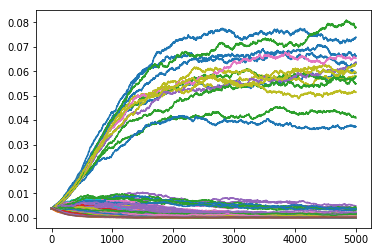

In [22]:
import matplotlib.pyplot as plt
norms = J.NORMS
len(norms)
for i in range(256):
	line = []
	for stat in distributedResults[4][0]:
		line.append(stat[0][i])

	plt.plot(line, label = "norm " + str(i+1))

In [ ]:
paramDicts2 = []

for i in range(16):
    myparams = defaultParameters.copy()
    myparams["w"] = 0.01 * i
    myparams["BATCHSPERAGENT"] = 10
    myparams["BATCHSIZE"] = 10
    myparams["NUMGENERATIONS"] = 10000
    myparams["perpetratorNorms"] = True
    paramDicts2.append(myparams)

print("paramDicts: " + str(paramDicts2))    
distributedResults2 = J.evolveDistributed(paramDicts2)
cacheRuns(distributedResults2, paramDicts2)